# Using Exploratory Data Analysis to make data driven recommendations for Instacart

-This project we will be working with data from the Instacart delivery platform that was released in 2017. The overall objective of the project is to clean up the data and give insight into the shopping habits of Instacart customers. We will do this by writing explanations and creating plots of our overall findings. With which can be used to help identify customer shopping habits and behaviors along with helping in creating marketing strategies. 

In [1]:
import pandas as pd

-Step 1: I Opened each individual data file and gave them each individual names. 
-Fixed issues in the formatting with the sep=";" parameter on every dataset. 
-Added the show_counts=True to the last dataset only, being order_products.

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
products = pd.read_csv('/datasets/products.csv', sep=";")
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=";")
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
departments = pd.read_csv('/datasets/departments.csv', sep=";")
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=";")
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [7]:
import matplotlib.pyplot as plt

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
orders.duplicated().sum()

15

-As shown in my notes from a lesson in Chapter 3, it says to use the duplicated() method together with sum() to get the number of duplicate values in a single column or duplicate rows in a DataFrame.
-If the answer is right it should mean that I have 15 duplicate orders.

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
#'order_dow': means day of the week and 'order_hour_of_day': means hour of day order was placed.
#Both of these come from the Data Dictionary in the Project Description notes.
#It seems there are 121 orders that have been placed at this exact date and time.

wednesday_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
wednesday_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


-I used a code with a logical operator to filter results along with information from instructions on the project in the Data Dictionary section combined with the orders dataset to match up the information. 
-Order_dow: being the day of the week. 
-I did the wednesday_orders with and without .info() so I could see both versions of information, I know it didn't ask me to. 

In [10]:
wednesday_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


In [11]:
# Remove duplicate orders

orders = orders.drop_duplicates()

In [12]:
# Double check for duplicate rows
#I was going to use the same code from above #orders.duplicated().sum(), but I was looking on Discord and don't think that would be the correct choice for this question.

# Find all duplicate rows
duplicate_rows = orders[orders.duplicated(keep=False)]

# Display the duplicate rows(so I believe this is showing me all the duplicate rows below)
duplicate_rows

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


-After fixing the remove duplicates cell I believe the following cells now have the correct answers as well with both answers coming back with no duplicates.

In [13]:
# Double check for duplicate order IDs only
#This answer would be telling me that there are still 15 duplicates in the order_id column.

duplicate_order_id = orders['order_id'].duplicated().sum()
duplicate_order_id

0

-It wants to know if one particular column(the order_id column) has any duplictaes left. 
-I'm pretty sure there was more than one way I could have done this, because I did it another way as well and got the same result, but decided that this is the best choice for what it's asking, the other way was a little more complicated.

### `products` data frame

In [14]:
# Check for fully duplicate rows
#As shown in my notes from a lesson in Chapter 3, it says to use the duplicated() method together with sum() to get the number of duplicate values in a single column or duplicate rows in a DataFrame.
#This answer tells me there are no duplicate rows in the products DataFrame.


products.duplicated().sum()

0

In [15]:
# Check for just duplicate product IDs
#I used the same formula/technique that I did above in the orders DataFrame question about duplicate IDs. 
#This answer tells me there are no duplicates in the product_id coulumn.

duplicate_product_ids = products['product_id'].duplicated().sum()
duplicate_product_ids

0

In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)

products['product_name_lower'] = products['product_name'].str.lower() # Converting product names to lowercase
duplicate_product_names = products[products.duplicated(subset='product_name_lower')] #Checking for duplicates
duplicate_product_names #Displaying the duplicate product names

,product_id,product_name,aisle_id,department_id,product_name_lower
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
436,437,NaN,100,21,NaN
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


-Its looks like there are 1361 products with duplicate product names.
-products.duplicated(subset='product_name', keep=False)...another code I tried in the 2nd line that gave me something different, still not 100% sure which one is right.

In [17]:
# Check for duplicate product names that aren't missing

# Filter out products with non-missing names
non_missing_names = products[~products['product_name'].isna()]

# Find duplicate product names, case insensitive
duplicate_product_names = non_missing_names[non_missing_names.duplicated(subset='product_name_lower')]

# Display duplicates
duplicate_product_names

#It looks like there are 104 duplicate names that aren't NaN.

,product_id,product_name,aisle_id,department_id,product_name_lower
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg
5455,5456,Green Tea With Ginseng and Honey,96,20,green tea with ginseng and honey
5558,5559,Cream Of Mushroom Soup,69,15,cream of mushroom soup
7558,7559,Cinnamon Rolls with Icing,105,13,cinnamon rolls with icing
9037,9038,American Cheese slices,21,16,american cheese slices
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


-The original technique I tried was from the very beginning of Chapter 3, which combines isna() with sum()  products.isna().sum(). I don't believe it was exactly correct, although I knew I was on the right track with isna().
-I also tried this technique as well, products['product_name'].isnull().sum(). It gave me the exact same answer (1258) as products.isna().sum(), but not the rest of the information. 
-In the end I looked into it and came to the conclusion that it was a little more detailed than either one of those, but isna() was the right place to start.
-I also want to point out to myself for future reference because it took me awhile to figure out that I needed that squiggly line before products in the first line to get a correct result. 

### `departments` data frame

-For this part I wasn't sure what I was supposed to do so I looked for help on Discord and it said I should do these particular methods and functions from the previous sections for departments and aisles. 
-I also chose to do both the head() and info() methods insead of just one of them.

In [18]:
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [20]:
# Check for fully duplicate rows
#Used the same code as the above previous DataFrames orders and products.
#There seems to be no fully duplicate rows.

departments.duplicated().sum()

0

In [21]:
# Check for just duplicate product IDs
#I used the same formula/technique that I did above in the orders and products DataFrames questions about duplicate IDs. 
#This answer tells me that there are no duplicate department_ids.

duplicate_department_id = departments['department_id'].duplicated().sum()
duplicate_department_id

0

### `aisles` data frame

-For this part I wasn't sure what I was supposed to do so I looked for help on Discord and it said I should do these particular methods and functions from the previous sections for departments and aisles. 
-I also chose to do both the head() and info() methods insead of just one of them.

In [22]:
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [23]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
# Check for fully duplicate rows
#Used the same code as the above previous DataFrames orders, products, and departments.
#This answer tells me there are no fully duplicate rows.

aisles.duplicated().sum()

0

In [25]:
# Check for just duplicate aisle IDs
#I used the same formula/technique that I did above in the orders, products, and departments DataFrames questions about duplicate IDs. 
#This answer tells me there are no duplicate aisle_ids.

duplicate_aisle_id = aisles['aisle_id'].duplicated().sum()
duplicate_aisle_id

0

### `order_products` data frame

-As shown in my notes from a lesson in Chapter 3, it says to use the duplicated() method together with sum() to get the number of duplicate values in a single column or duplicate rows in a DataFrame.
-order_products.duplicated().sum(), is what I was using but after messing around with this and the next question I didn't think it was right. 
-I tried both of these codes below but they both gave me the same answer that I'm getting, so I'm not sure if either of them are right.
-I believe this answer means the dataset is free from duplicates.

In [26]:
# Check for fullly duplicate rows

fully_duplicates = order_products[order_products.duplicated()]
fully_duplicates

#fully_duplicates = order_products[order_products.duplicated(keep = False)]
#fully_duplicates

,order_id,product_id,add_to_cart_order,reordered


In [27]:
# Double check for any other tricky duplicates

tricky_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'])]
tricky_duplicates

,order_id,product_id,add_to_cart_order,reordered


-Assuming this answer is accurate, that would mean no duplicates were found with the combination of order_id and product_id. 
-tricky_duplicates = order_products[order_products.duplicated(subset=['order_id', 'add_to_cart_order'])]
-tricky_duplicates (This is just different code I was trying, keeping in case I need it)
-I believe this means the dataset is free from duplicates.

## Find and remove missing values


### `products` data frame

In [28]:
#1. Finding the missing values in 'product_name'

missing_product_names = products['product_name'].isnull().sum() 
(f"There are {missing_product_names} missing product names.")

#This answer tells me there are 1258 missing product names.

'There are 1258 missing product names.'

In [29]:
# Are all of the missing product names associated with aisle ID 100?
#This answer tells me that all of the missing products are associated with aisle_id_100.

missing_product_names = products[products['product_name'].isnull()]
associated_with_aisle_100 = missing_product_names['aisle_id'] == 100
all_associated = associated_with_aisle_100.all()  # Verifies if all entries match
all_associated

True

In [30]:
# Are all of the missing product names associated with department ID 21?
#This answer tells me that all of the missing product names are associated with department_id_21.

missing_product_names = products[products['product_name'].isnull()]
associated_with_department_21 = missing_product_names['department_id'] == 21
all_associated_2 = associated_with_department_21.all()  # Verifies if all entries match
all_associated_2

True

In [31]:
# What is this aisle and department?

aisle_name = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]

department_name = departments[departments['department_id'] == 21]['department'].values[0]
   
print(f"Aisle: {aisle_name}")
print(f"Department: {department_name}")

Aisle: missing
Department: missing


-I don't know why but I had a really hard time with this one. I tried probably more than 15 different things trying to get some kind of viable answer.
-All the ones I kept trying would only print like one part and since I'm not even sure what this question is asking for I wasn't satisfied with that.
-After trying so many things I finally decided to add the print function in front of both things I was trying to print, even though I was told you don't have to use it in Jupyter, and it finally printed both items.
-So I finally got an answer that seemed like it could be what the question is asking for. This answer just says that the Aisle 100 and Department 21 are missing.

In [32]:
# Fill missing product names with 'Unknown'

products['product_name'].fillna('Unknown', inplace=True) #1. Filled missing values with 'Unknown'

remaining_missing = products['product_name'].isnull().sum() #2. Verify that all the missing values have been removed

remaining_missing

#This answer verifies that all missing values were replaced with 'Uknown' and that all the missing values were removed.

0

### `orders` data frame

In [33]:
non_first_orders = orders[orders['order_number'] > 1]
non_first_orders

#Based on the second question I inferred that this question needed to know all the orders that are not a customers first order. 
#The results show that the amount of orders that are not customers first orders are 450148.

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [34]:
# Are there any missing values where it's not a customer's first order?
#Assuming this is correct I think this answer means there's no missing values where it's not a customer's first order.

missing_in_non_first_orders = non_first_orders[non_first_orders.isnull().any(axis=1)]
missing_in_non_first_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [35]:
#To be able to answer the next question I have to identify which columns have null values in them in this cell. 
#The answer shows me that the add_to_cart_order column has 836 null values.

null_columns = order_products.isnull().sum()
null_columns[null_columns > 0]

add_to_cart_order    836
dtype: int64

In [36]:
# What are the min and max values in this column?
#The Min Value= 1 and the Max Value= 64.

print("Min value:", order_products['add_to_cart_order'].min())
print("Max value:", order_products['add_to_cart_order'].max())

Min value: 1.0
Max value: 64.0


In [37]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#There are 836 order_ids with at least one value missing in add_to_cart_order.

missing_order_ids = order_products[order_products['add_to_cart_order'].isnull()]['order_id']
missing_order_ids

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [38]:
# Do all orders with missing values have more than 64 products?
#If the previous answers are correct, there are 836 products with missing values. 
#Here there are only 70 products that have missing values. So, no not all orders with missing values have more than 64 products.

order_counts = order_products.groupby('order_id').size()
missing_orders_above_64 = order_counts[order_counts.index.isin(missing_order_ids) & (order_counts > 64)]
print("Orders with missing `add_to_cart_order` and more than 64 products:", missing_orders_above_64)

Orders with missing `add_to_cart_order` and more than 64 products: order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64


In [39]:
# Replace missing values with 999 and convert column to integer type

order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products['add_to_cart_order'].head()

0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [40]:
orders[['order_hour_of_day', 'order_dow']].describe()

,order_hour_of_day,order_dow
count,478952.000000,478952.000000
mean,13.447034,2.775051
std,4.224567,2.045901
min,0.000000,0.000000
25%,10.000000,1.000000
50%,13.000000,3.000000
75%,16.000000,5.000000
max,23.000000,6.000000


-I see the describe() function does show me the min() and max() information and it correlates to the information we are told to find.

In [41]:
hour_min = orders['order_hour_of_day'].min()
hour_max = orders['order_hour_of_day'].max()
(f"Order hour min: {hour_min}, max: {hour_max}")

'Order hour min: 0, max: 23'

In [42]:
dow_min = orders['order_dow'].min()
dow_max = orders['order_dow'].max()
(f"Order day of week min: {dow_min}, max: {dow_max}")

'Order day of week min: 0, max: 6'

### [A2] What time of day do people shop for groceries?

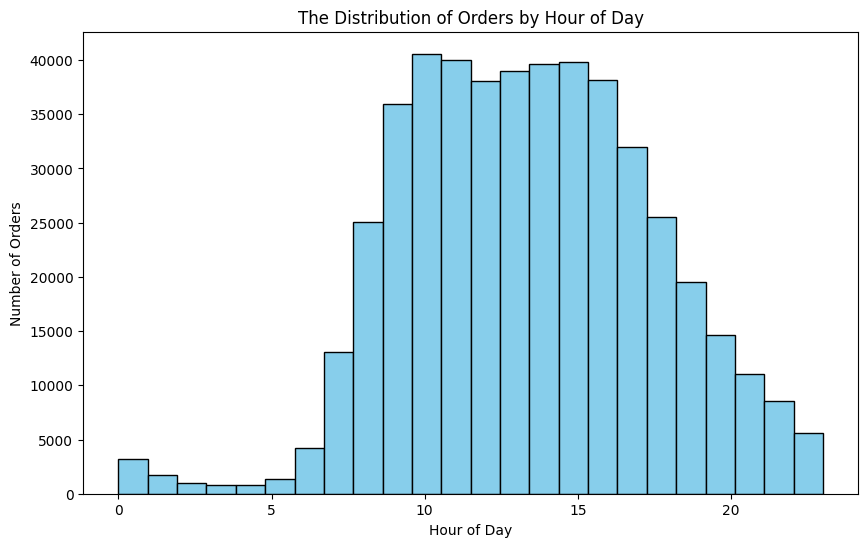

In [43]:
#Plot the distribution of order hours
plt.figure(figsize=(10, 6))
orders['order_hour_of_day'].hist(bins=24, color='skyblue', edgecolor='black')
plt.title('The Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.show()

### [A3] What day of the week do people shop for groceries?

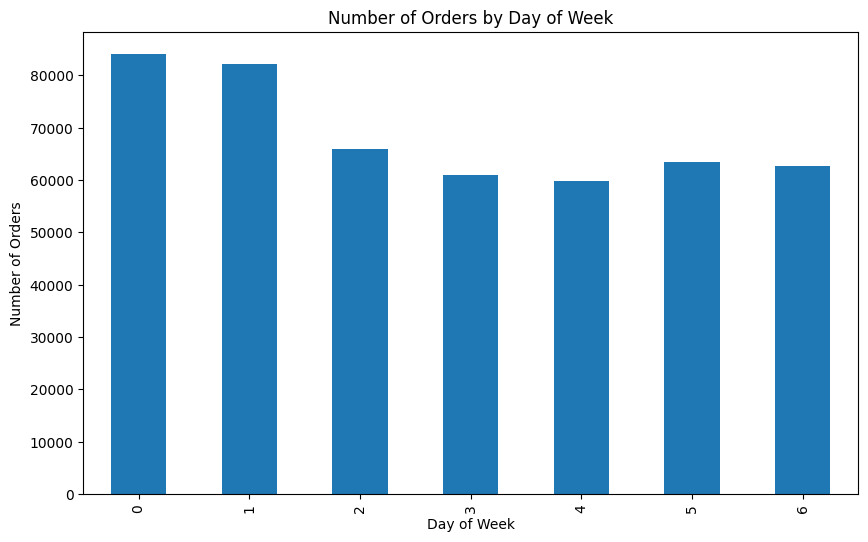

In [44]:
plt.figure(figsize=(10,6))
orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

### [A4] How long do people wait until placing another order?

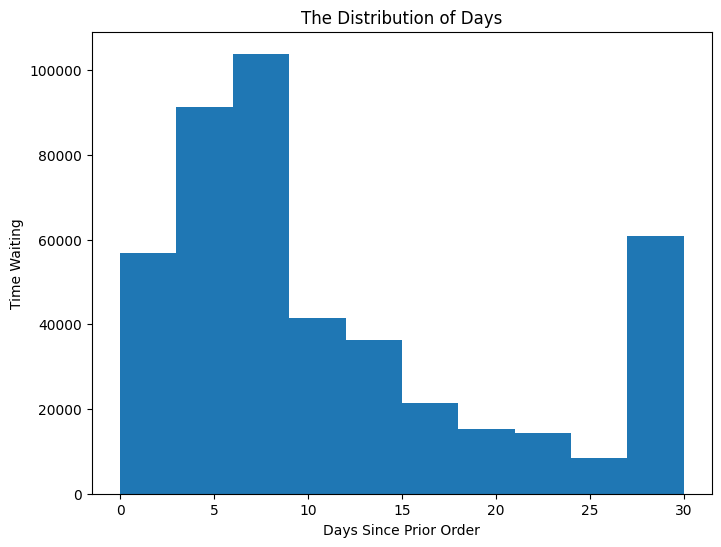

In [45]:
plt.figure(figsize=(8, 6))
orders['days_since_prior_order'].sort_index().plot(kind='hist')
plt.title('The Distribution of Days')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Time Waiting')
plt.show()

-Conclusion: The first chart is very focused in the middle which would suggest their peak hours are between like 9-5 or 10-4.
-The 2nd chart suggest that the number of orders/day of the week is pretty wide spread, but you do have a pretty big concentration to the left suggesting that theres a large group of customers that place fewer orders.
-The 3rd chart suggest, at minumum the least amount of people wait about the longest time around 25 days before they order again and at maximum the most amost amount of people wait around the shortest time around 7-8 days before they order again.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [46]:
wednesday_orders = orders[orders['order_dow'] == 2]['order_hour_of_day']
saturday_orders = orders[orders['order_dow'] == 5]['order_hour_of_day']

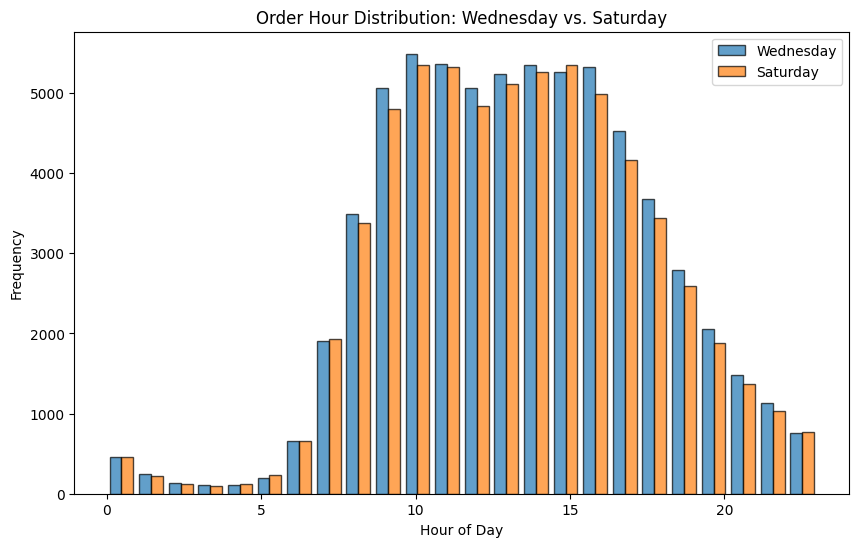

In [47]:
plt.figure(figsize=(10, 6))
plt.hist([wednesday_orders, saturday_orders], bins=24, label=['Wednesday', 'Saturday'], edgecolor='k', alpha=0.7)
plt.title('Order Hour Distribution: Wednesday vs. Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

-Conclusion: I would say that for the most part both days are pretty even throughout especially on the days where the frequency is lower.
-However, the days towards the middle where the frequency of orders is the highest Wednesday pulls ahead in almost every single column except for one. 
-So, my overall conclusion is that Wednesdays are the busier days with higher frequency in orders compared to Saturdays.

### [B2] What's the distribution for the number of orders per customer?

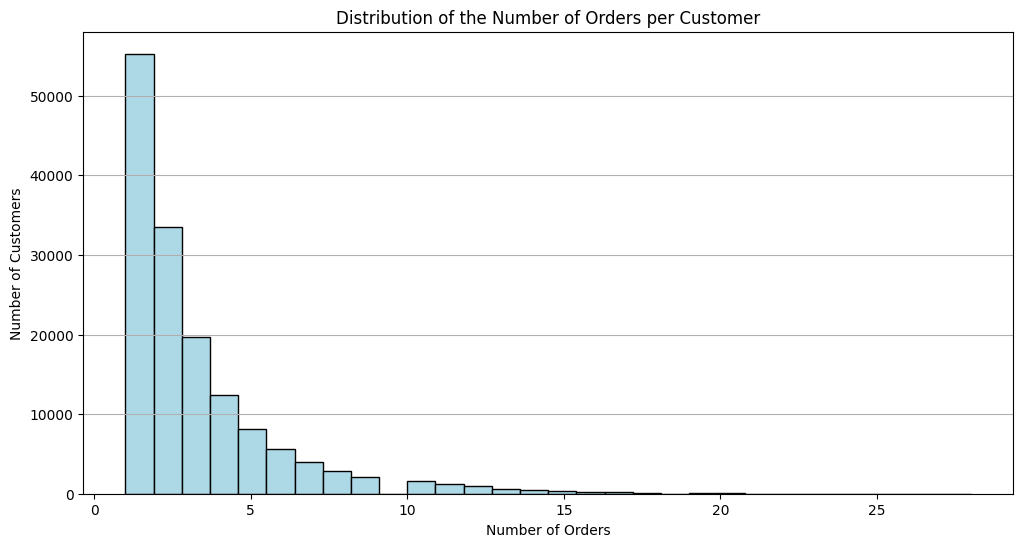

In [48]:
# Merge the data
merged_data = order_products.merge(orders[['user_id', 'order_id']], on='order_id', how='left')

# Group by user_id and count orders
order_counts = merged_data.groupby('user_id')['order_id'].nunique()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.hist(order_counts, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of the Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

-Conclusion: This graphh tells me that very few customers place more than a handful of orders. Given how the graph is focused heavily to the left it implies that not many customers place multiple orders. The only thing I don't know is if they are talking about in the same visit or throughout time, because it's not specfic. 

### [B3] What are the top 20 popular products (display their id and name)?

In [49]:
top_20_products = order_products.merge(products,on = 'product_id', how = 'left')
top_20_products.loc[:,['product_id', 'product_name']].head(20)


,product_id,product_name
0,11440,Chicken Breast Tenders Breaded
1,1560,Bag Of Ice
2,26683,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,8670,Diced Tomatoes
4,1940,Organic 2% Reduced Fat Milk
5,21616,Organic Baby Arugula
6,12341,Hass Avocados
7,44925,Natural Provolone Cheese Slices
8,36259,Whole Natural Value Pack Almonds
9,23315,Organic Cold Brew Coffee


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
# Merge to include product names
reordered_items = order_products[order_products['reordered'] == 1].merge(products, on='product_id', how='left')

# Use value_counts to count product names
top_reordered_products = reordered_items['product_name'].value_counts().head(20)

# Display the result
top_reordered_products

Banana                      55763
Bag of Organic Bananas      44450
Organic Strawberries        28639
Organic Baby Spinach        26233
Organic Hass Avocado        23629
Organic Avocado             18743
Organic Whole Milk          16251
Large Lemon                 15044
Organic Raspberries         14748
Strawberries                13945
Limes                       13327
Organic Yellow Onion        11145
Organic Garlic              10411
Organic Zucchini            10076
Cucumber Kirby               9538
Organic Fuji Apple           8989
Apple Honeycrisp Organic     8836
Organic Blueberries          8799
Organic Lemon                8412
Organic Half & Half          8389
Name: product_name, dtype: int64

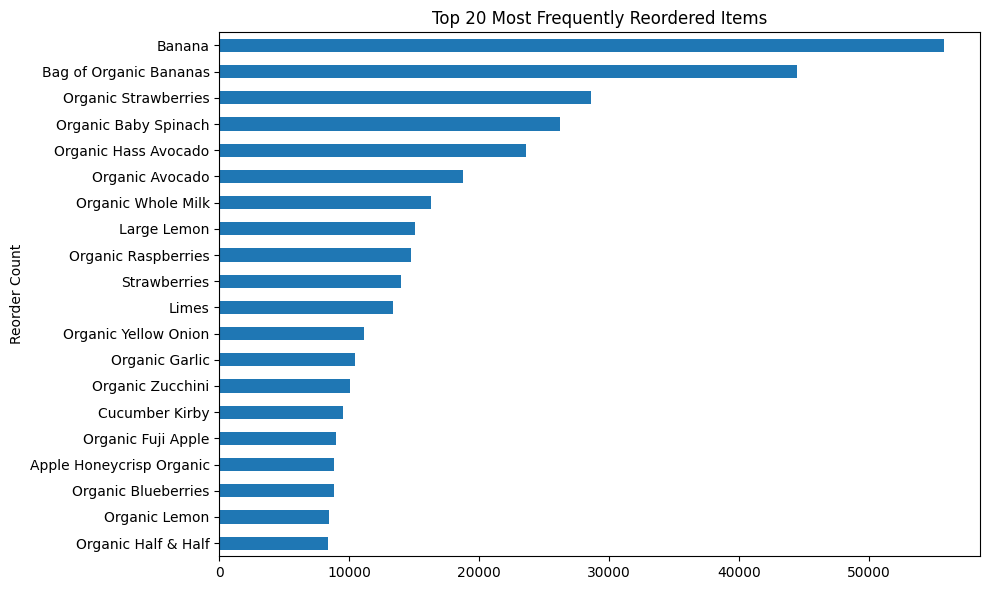

In [51]:
top_reordered_products.plot(
    kind='barh',
    x='product_name',
    y='reorder_count',
    title='Top 20 Most Frequently Reordered Items',
    xlabel='Reorder Count',
    ylabel='Product Name',
    figsize=[10,6]
)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

-These are the top 20 items reordered most frequently. With the Product Name and the Product ID.
-Notice there mostly Fresh and Organic foods, veggies, fruits, etcera.

### [C3] For each product, what proportion of its orders are reorders?

In [52]:
reorders = order_products.groupby('product_id')['reordered'].sum()
total_orders = order_products.groupby('product_id')['product_id'].size()
reorder_proportion = (reorders / total_orders) * 100
reorder_proportion = reorder_proportion.round(2)
reorder_proportion

product_id
1        56.43
2         0.00
3        73.81
4        51.02
7        50.00
         ...  
49690    80.00
49691    43.06
49692    41.67
49693    44.00
49694    33.33
Length: 45573, dtype: float64

In [53]:
reorder_proportions = pd.DataFrame({'reorder_proportion': reorder_proportion})
reorder_proportions = reorder_proportions.reset_index()

product_reorder_info = pd.merge(products[['product_id', 'product_name']], reorder_proportions, on='product_id', how='left')

product_reorder_info.head(30)

,product_id,product_name,reorder_proportion
0,1,Chocolate Sandwich Cookies,56.43
1,2,All-Seasons Salt,0.00
2,3,Robust Golden Unsweetened Oolong Tea,73.81
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,51.02
4,5,Green Chile Anytime Sauce,NaN
5,6,Dry Nose Oil,NaN
6,7,Pure Coconut Water With Orange,50.00
7,8,Cut Russet Potatoes Steam N' Mash,31.58
8,9,Light Strawberry Blueberry Yogurt,76.19
9,10,Sparkling Orange Juice & Prickly Pear Beverage,44.81


### [C4] For each customer, what proportion of their products ordered are reorders?

In [54]:
# Merge orders with order_products
orders_concat = orders.merge(order_products, on='order_id')

# Calculate total orders and reordered ones per customer
total_orders = orders_concat.groupby('user_id')['product_id'].count()
reordered_orders = orders_concat.groupby('user_id')['reordered'].sum()

# Calculate reorder proportion
reorder_proportion = reordered_orders / total_orders

reorder_proportion_df = reorder_proportion.reset_index(name='reordered_proportion')

reorder_proportion_df.head()

,user_id,reordered_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571


### [C5] What are the top 20 items that people put in their carts first? 

In [55]:
# Filter first items added to cart
first_cart_items = order_products[order_products['add_to_cart_order'] == 1]

# Count occurrences of first-cart items
first_counts = first_cart_items['product_id'].value_counts()
first_counts_df = first_counts.reset_index()

# Rename columns
first_counts_df.columns = ['product_id', 'count']

# Sort values by 'count' in descending order
first_counts_df = first_counts_df.sort_values(by='count', ascending=False)
top_20_first = first_counts_df.head(20)
top_20_first_info = top_20_first.merge(products[['product_id', 'product_name']], on='product_id')

top_20_first_info


,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


-Final Conclusion: In this project, we explored shopping patterns using Instacart data to identify customer trends. 
-My analysis revealed peak shopping occurs midday, with significant reorder activity in mostly fresh and organic foods like vegetables and fruits as indicated in the top 20 first-cart items. 
-Key shopping times when order activity peaks is mid-day, which is the best time for customer engagement. 
-These insights can offer valuable guidance for inventory management as well as targeted marketing efforts, to use to enhance the understanding of customer behavior on the platform.